# Homework #4:
## 5.5 Integration & 6.4.2 Heat Capacity of a Solid
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 9/14/19|
|Updated|9/14/19|

## 5.5 Integration
Calculate the following integrals based on three different rules:

\begin{equation*}
\int_0^3 (x^2-x+1) dx
\tag{1}
\end{equation*}
\begin{equation*}
\int_0^3 (x^4-x+1) dx
\tag{2}
\end{equation*}
\begin{equation*}
\int_0^3 \text{exp}(-x^2) dx
\tag{3}
\end{equation*}

For Eq. 1, how many sampling points are needed for Simpson's rule?

In [96]:
import numpy as np

class Integrate:
    def Rectangle(f, start, end, parts):
        """
        Integrate by a Riemann sum of rectangles over the 
        function 'f', between 'start' and 'end', over an
        even number of 'parts'.
        """

        # define the X,Y points
        deltax = (end - start) / parts
        resultsx = np.linspace(start, end, parts)
        resultsy = f(resultsx)

        # calculate the area
        area = np.empty([parts], float)
        for i in range(parts):
            area[i] = resultsy[i]*deltax

        return sum(area)

    def Trapezoid(f, start, end, parts):
        """
        Integrate by a Riemann sum of trapezoids over the 
        function 'f', between 'start' and 'end', over an 
        even number of 'parts'.
        """

        # define the X,Y points
        deltax = (end - start) / parts
        resultsx = np.linspace(start, end, parts+1)
        resultsy = f(resultsx)

        # calculate the area
        area = np.empty([parts], float)
        for i in range(parts):
            area[i] = (resultsy[i]+resultsy[i+1]) * deltax/2

        return sum(area)

    def Simpson(f, start, end, parts):
        """
        Integrate by Simpson's rule over the function 'f',
        between 'start' and 'end', over an even number of
        'parts'.
        """

        # define the X,Y points
        deltax = (end - start) / parts
        resultsx = np.linspace(start, end, parts+1)
        resultsy = f(resultsx)

        # calculate the area
        area = np.empty([parts+1], float)
        for i in range(parts+1):
            if i == 0 or i == parts:
                coef = 1/3
            elif i%2 == 1:
                coef = 4/3
            else: 
                coef = 2/3
            area[i] = coef*resultsy[i]*deltax

        return sum(area)

\begin{equation*}
\int_0^3 (x^2-x+1) dx = \frac{15}{2} = 7.5
\tag{1}
\end{equation*}

In [92]:
#define function (1)
f1 = lambda x: x**2 - x + 1

print("Sum of the area using the following rules:")
print("Rectangle:", Integrate.Rectangle(f1, 0, 3, 10))
print("Trapezoid:", Integrate.Trapezoid(f1, 0, 3, 10))
print("Simpson's:", Integrate.Simpson(f1, 0, 3, 10))

Sum of the area using the following rules:
Rectangle: 7.999999999999998
Trapezoid: 7.544999999999999
Simpson's: 7.499999999999998


\begin{equation*}
\int_0^3 (x^4-x+1) dx = \frac{471}{10} = 47.1
\tag{2}
\end{equation*}

In [93]:
#define function (2)
f2 = lambda x: x**4 - x + 1

print("Sum of the area using the following rules:")
print("Rectangle:", Integrate.Rectangle(f2, 0, 3, 10))
print("Trapezoid:", Integrate.Trapezoid(f2, 0, 3, 10))
print("Simpson's:", Integrate.Simpson(f2, 0, 3, 10))

Sum of the area using the following rules:
Rectangle: 55.28888888888888
Trapezoid: 47.909189999999995
Simpson's: 47.103239999999985


\begin{equation*}
\int_0^3 \text{exp}(-x^2) dx = \frac{\sqrt{\pi}\operatorname{erf}(3)}{2} \approx{0.8862073482595212}
\tag{3}
\end{equation*}

In [113]:
#define function (3)
f3 = lambda x: np.exp(-x**2) 

print("Sum of the area using the following rules:")
print("Rectangle:", Integrate.Rectangle(f3, 0, 3, 10))
print("Trapezoid:", Integrate.Trapezoid(f3, 0, 3, 10))
print("Simpson's:", Integrate.Simpson(f3, 0, 3, 10))

Sum of the area using the following rules:
Rectangle: 0.9475992785537808
Trapezoid: 0.8862020336373999
Simpson's: 0.8862065522460074


For the first integral, Eq. 1, at least three sampling points are needed for Simpson's rule (minimum number of points to define a unique quadratic curve).

## 6.4.2 Heat Capacity of a Solid

Debye's thory of solids gives the heat capacity of a solid at temperature $T$ to be

\begin{equation*}
C_V = 9V\rho k_B (\frac{T}{\theta_D})^3 \int_0^{\theta_D/T} \frac{x^4e^x}{(e^x-1)^2}dx,
\tag{4}
\end{equation*}

where $V$ is the volume of the solid, $\rho$ is the density of atoms, $k_B$ is Boltzmann constant, and $\theta$ is the Debye temperature.

1. Write a program to calculate $C_V$ for a given value of $T$ for a sample of 1000 $cm^3$ of aluminum (Al), in which the density $\rho$ is 6.022 $\times 10^{28} m^3$ and $\theta_D$ = 428 K. 

2. Choose at least one way to evaluate the integral from the following:
     - Simpson's or composite trapezoid rule
     - Built-in function from scipy library

3. Plot $C_V$ as a function of temperature from $T$ = 5 K to $T$ = 500 K.

In [155]:
from scipy import integrate

def CalcC_V(V, rho, theta, T):
    """
    Calculate the heat capacity of a solid at temperature 'T',
    with volume 'V', density 'rho', and Debye temperature 'theta'.
    """
    # define Botlzmann's constant as 1.38064852 × 10^-23 J/K
    k = 1.38064852e-23
    # define integrand of heat capacity formula, Eq. 4
    integrand = lambda x: ((x**4)*np.exp(x)) / (np.exp(x)-1)**2
    # Calculate and return C_V using Debye theory of solids
    #return ((((T/theta)**3)*9*V*rho*k)*(integrate.quad(integrand, 0, (theta/T))[0])) # [0] since SciPy integrate returns a tuple
    return (((T/theta)**3)*9*V*rho*k)*(integrate.quad(f,0,theta/T))[0]

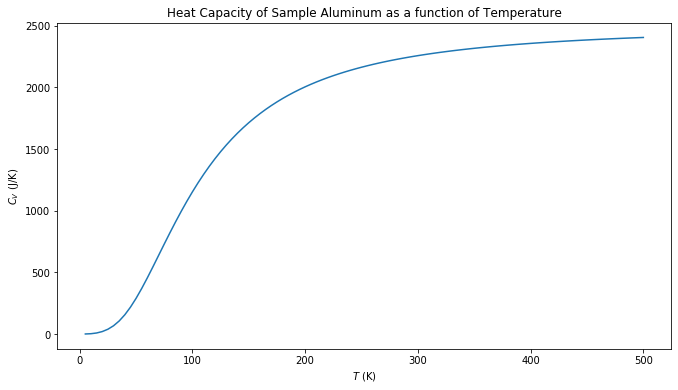

In [184]:
import matplotlib.pyplot as plt

# constants for sample solid of aluminum (Al)
V = 0.001      # 1000 cm^3 in m^3
rho = 6.022e28 # m^3
theta = 428    # K

# plot C_V as a function of temperature from T = 5 K to 500 K
temps = np.linspace(5, 500, 100)
C_V_arr = np.empty([temps.size])

for t in temps:
    np.append(C_V_arr, CalcC_V(V, rho, theta, t))

plt.figure(figsize=(11, 6))
plt.title('Heat Capacity of Sample Aluminum as a function of Temperature')
plt.xlabel('$T$ (K)')
plt.ylabel('$C_V$ (J/K)')
plt.plot(temps, C_Vs)
plt.show()